In [1]:
import pandas as pd
import numpy as np

# import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import layers
# import semopy
from sklearn.model_selection import train_test_split
import os

data_dir = 'Data'
X_cols = ['age_calculated', 'ncipr_min_osat', 'male', 'female', 'Bluish Lips/Face',
       'Chest Pressure/Chest Pain', 'Chills or Shaking',
       'Complete Loss of Smell (Anosmia)', 'Complete Loss of Taste (Ageusia)',
       'Confusion or Inability to Arouse', 'Cough',
       'Diarrhea (>=3 loose/looser than normal stools/24 hr. period)',
       'Ear pain', 'Eye Redness with or without Discharge',
       'Fever (>100.4 F/38 C)', 'Headache', 'Muscle Pain/Body Aches',
       'Nausea or Vomiting', 'None of these apply', 'Other',
       'Partial Loss of Smell (Partial Anosmia)',
       'Partial Loss of Taste (Partial Ageusia)',
       'Runny Nose/Sinus Congestion',
       'Shortness of Breath/Difficulty Breathing', 'Skin rash or Skin ulcers',
       'Sneezing', 'Sore Throat', 'Unusual Fatigue/Lethargy', 'Wheezing']

y_col =['ncipr_how_severe_self']

a_col = ['oxygen_administered']


data_path = os.path.join(data_dir, 'covid_data.pickle')


2022-05-01 00:37:25.612985: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-01 00:37:25.613054: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def get_process_data(data_path, X_cols, y_col, a_col, test_size=0.2, random_state=23423):
    covid_df = pd.read_pickle(data_path).astype(np.float32)
    train_df, test_df = train_test_split(covid_df, test_size=test_size, random_state=random_state)

    train_dic = {'X':train_df[X_cols],
                'a':train_df[a_col],
                'y':train_df[y_col]
                }

    test_dic = {'X':test_df[X_cols],
                'a':test_df[a_col],
                'y':test_df[y_col]
            }
    return train_dic, test_dic

In [3]:
train_dic, test_dic = get_process_data(data_path,X_cols, y_col, a_col,)

In [4]:
# model_spec = f"""
#     # measurement model
#     U_a =~ {" + ".join(X_cols)} + {" + ".join(a_col)})
#     U_y =~ {" + ".join(X_cols)} + {" + ".join(a_col)}) + {" + ".join(y_col)})


# """

In [5]:
# " + ".join(a_col)

In [6]:
inputs = keras.Input(shape=(len(X_cols,)))
a = keras.layers.Dense(1, activation=None)(inputs)

y = keras.layers.Dense(1)(keras.layers.Concatenate()([inputs, a]))

model = keras.Model(inputs = inputs, outputs=[a,y])

model.compile(loss='mse')

2022-05-01 00:37:30.786487: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-01 00:37:30.788648: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-01 00:37:30.788718: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-01 00:37:30.788761: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-01 00:37:30.788804: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [7]:
# model.summary()

In [8]:
history = model.fit(x=train_dic['X'], y=[train_dic['a'], train_dic['y']], epochs=100, validation_data=(test_dic['X'], [test_dic['a'], test_dic['y']]))

Epoch 1/100
44/44 [==============================] - 1s 6ms/step - loss: 2467.1328 - dense_loss: 2458.0261 - dense_1_loss: 9.1062 - val_loss: 2136.7559 - val_dense_loss: 2129.0779 - val_dense_1_loss: 7.6779
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 1864.3336 - dense_loss: 1857.7181 - dense_1_loss: 6.6156 - val_loss: 1596.5425 - val_dense_loss: 1590.9496 - val_dense_1_loss: 5.5928
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 1364.2275 - dense_loss: 1359.4663 - dense_1_loss: 4.7614 - val_loss: 1138.1584 - val_dense_loss: 1134.2903 - val_dense_1_loss: 3.8681
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 944.5013 - dense_loss: 941.1146 - dense_1_loss: 3.3865 - val_loss: 759.8207 - val_dense_loss: 757.0368 - val_dense_1_loss: 2.7839
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 604.8997 - dense_loss: 602.4113 - dense_1_loss: 2.4884 - val_loss: 460.6123 - val_dense_loss: 458.3463 

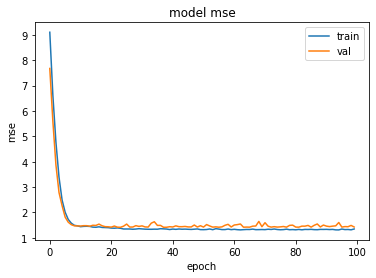

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['dense_1_loss'])
plt.plot(history.history['val_dense_1_loss'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [13]:
history.history['val_dense_1_loss'][np.argmin(history.history['dense_1_loss'])]

1.6030499935150146

In [20]:
# train_dic['y'].describe()

,ncipr_how_severe_self
count,1397.000000
mean,1.513243
std,1.435082
min,0.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,4.000000


In [ ]:
# import keras.backend as K

# def customLoss(yTrue,yPred):
#     return K.sum(K.log(yTrue) - K.log(yPred))

In [21]:
# import seaborn as sns

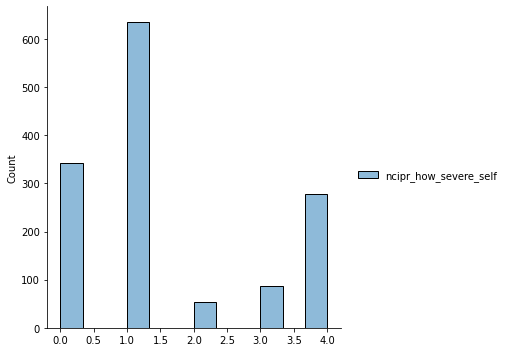

In [22]:
# sns.displot(train_dic['y'])

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [20]:
a = LogisticRegression(penalty='none', max_iter=1000).fit(train_dic['X'], train_dic['a'].to_numpy().ravel())

In [21]:
a.score(train_dic['X'], train_dic['a'].to_numpy().ravel())

0.9255547602004295

In [24]:
a_hat = a.predict(train_dic['X']).reshape(-1, 1)

In [25]:
y = LinearRegression().fit(np.concatenate((train_dic['X'], a_hat), axis=1), train_dic['y'])

In [27]:
y_hat = y.predict(np.concatenate((test_dic['X'], a.predict(test_dic['X']).reshape(-1, 1)), axis=1))

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(y_hat, test_dic['y'])

1.411753